<a href="https://colab.research.google.com/github/Pratyush0210/Data_Analysis_Projects/blob/main/correct_states_land_use_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **Indian States/UTs Land use pattern**



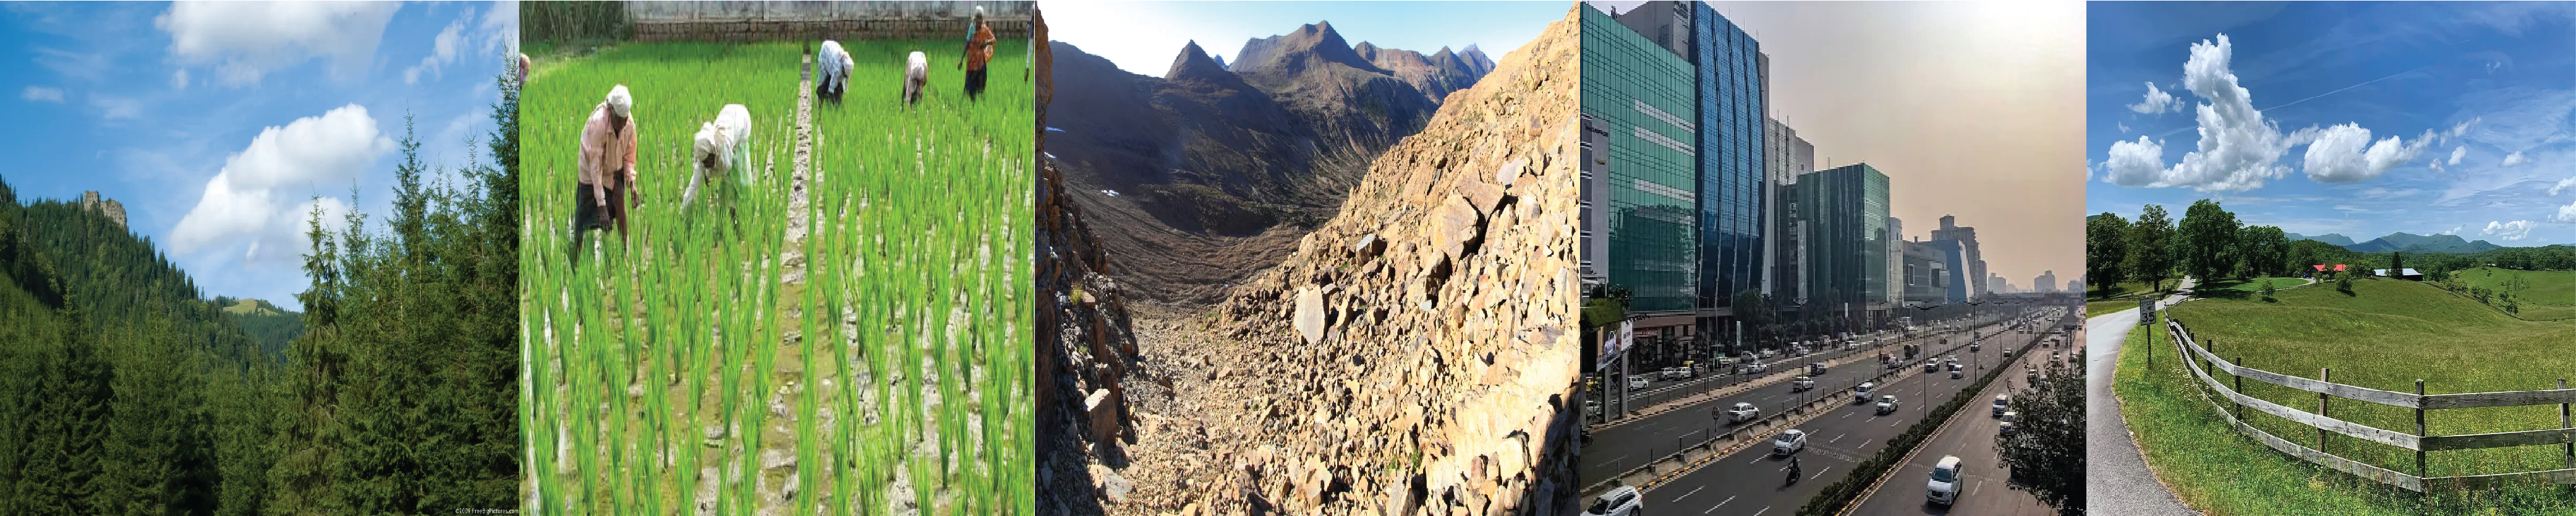

Source: India State of Forest Report, 2009; **Land Use Statistics, Ministry of Agriculture, GOI, 2008-09; Area is in thousands Hectares (ha)

link of dataset: https://data.gov.in/resource/statesuts-wise-land-use-pattern

# **LAND USE STATISTICS CONCEPTS & DEFINITIONS**
### **A: NINE-FOLD CLASSIFICATION:**
#### **1. Forest Area:** 
This includes all land classified either as forest under any legal enactment, or administered as forest, whether State-owned or private, and whether wooded or maintained as potential forest land. The area of crops raised in the forest and grazing lands or areas open for grazing within the forests remain included under the “forest area”.
#### **2. Area under Non-agricultural Uses:** 
This includes all land occupied by buildings, roads and railways or under water, e.g. rivers and canals, and other land put to uses other than agriculture.
#### **3. Barren and Un-culturable Land:** 
This includes all land covered by mountains, deserts, etc. Land, which cannot be brought under cultivation except at an exorbitant cost is classified as unculturable whether such land is in isolated blocks or within cultivated holdings.
#### **4. Permanent Pasture and other Grazing Land:** 
This includes all grazing land whether it is permanent pasture/meadows or not. Village common grazing land is included under this category.
#### **5. Land under Miscellaneous Tree Crops, etc.:** 
This includes all cultivable land, which is not included in ‘Net area sown' but is put to some agricultural use. Land under casuring trees, thatching grasses, bamboo bushes and other groves for fuel, etc. which are not included under ‘Orchards' are classified under this category.
#### **6. Culturable Waste Land:** 
This includes land available for cultivation, whether taken up or not taken up for cultivation once, but not cultivated during the last five years or more in succession including the current year for some reason or the other. Such land may be either fallow or covered with shrubs and jungles, which are not put to any use. They may be accessible or inaccessible and may lie in isolated blocks or within cultivated holdings.
#### **7. Fallow Lands other than Current Fallows:** 
This includes all land, which was taken up for cultivation but is temporarily out of cultivation for a period of not less than one year and not more than five years.
#### **8. Current Fallows:** 
This represents cropped area, which is kept fallow during the current year.
#### **9. Net Area Sown:** 
This represents the total area sown with crops and orchards. Area sown more than once in the same year is counted only once.
### **B. DEFINITIONS OF SOME COMMONLY USED TERMS:**
#### **(i) Geographical Area:** 
The latest figures of geographical area of the State/Union Territories are as provided by the Office of the Surveyor General of India.
#### **(ii) Reporting Area for Land Utilisation Statistics:** 
The Reporting area stands for the area for which data on land use classification is available. In areas where land utilization
figures are based on land records, reporting area is the area according to village papers, i.e. the papers prepared by the village accountants. In some cases, the village papers may not be maintained in respect of the entire area of the State. For example, village papers are not prepared for the forest areas but the magnitude of such area is known. Also there are tracts in
many States for which no village paper exists. In such cases, estimates of classification of area from agriculture census, 2000-01 and 2005-06 are adopted to complete the coverage. 


##### content found on Directorate of Economics and Statistics, Department of Agriculture, Cooperation and Farmers Welfare, Ministry of Agriculture and Farmers Welfare.

link https://eands.dacnet.nic.in/LUS-2010-11/Concept.pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic operations
import numpy as np

# For DataFrame manupulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
# import seaborn.objects as so

# for missing Values
import missingno as mno

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use("fivethirtyeight")

In [ ]:
#!pip install matplotlib==3.4.2

## **1. Reading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Land pattern/states_land_use_pattern.csv")

print(df.shape)

(70, 12)


In [ ]:
pd.options.display.max_columns = 100
#pd.set_option("max_columns", 100)
df.style.background_gradient(cmap="viridis",low=0.20,high=1)

In [ ]:
pd.options.display.max_columns = 100
df.head(6).style.background_gradient(cmap = "YlGn",low=0.75,high=0.1)

In [ ]:
df.columns

Index(['States/UTs', 'Category', 'Total geographical area',
       'Reporting area for land utilization', 'Forests',
       'Not available for cultivation',
       'Permanent pastures and other grazing lands',
       'Land under miscellaneous tree crops & groves', 'Culturable wasteland',
       'Fallow lands other than current fallows', 'Current fallows',
       'Net area sown'],
      dtype='object')

In [ ]:
pd.options.display.max_columns = 100
df.iloc[:,2:].describe().style.background_gradient(cmap = "viridis", low=0.75)

In [ ]:
# lets check the descriptive statistics for the categorical data

df.iloc[:, :2].describe(include = "object")

States/UTs Category
count               70       70
unique              35        2
top     Andhra Pradesh     Area
freq                 2       35

# **2. Cleaning the data**

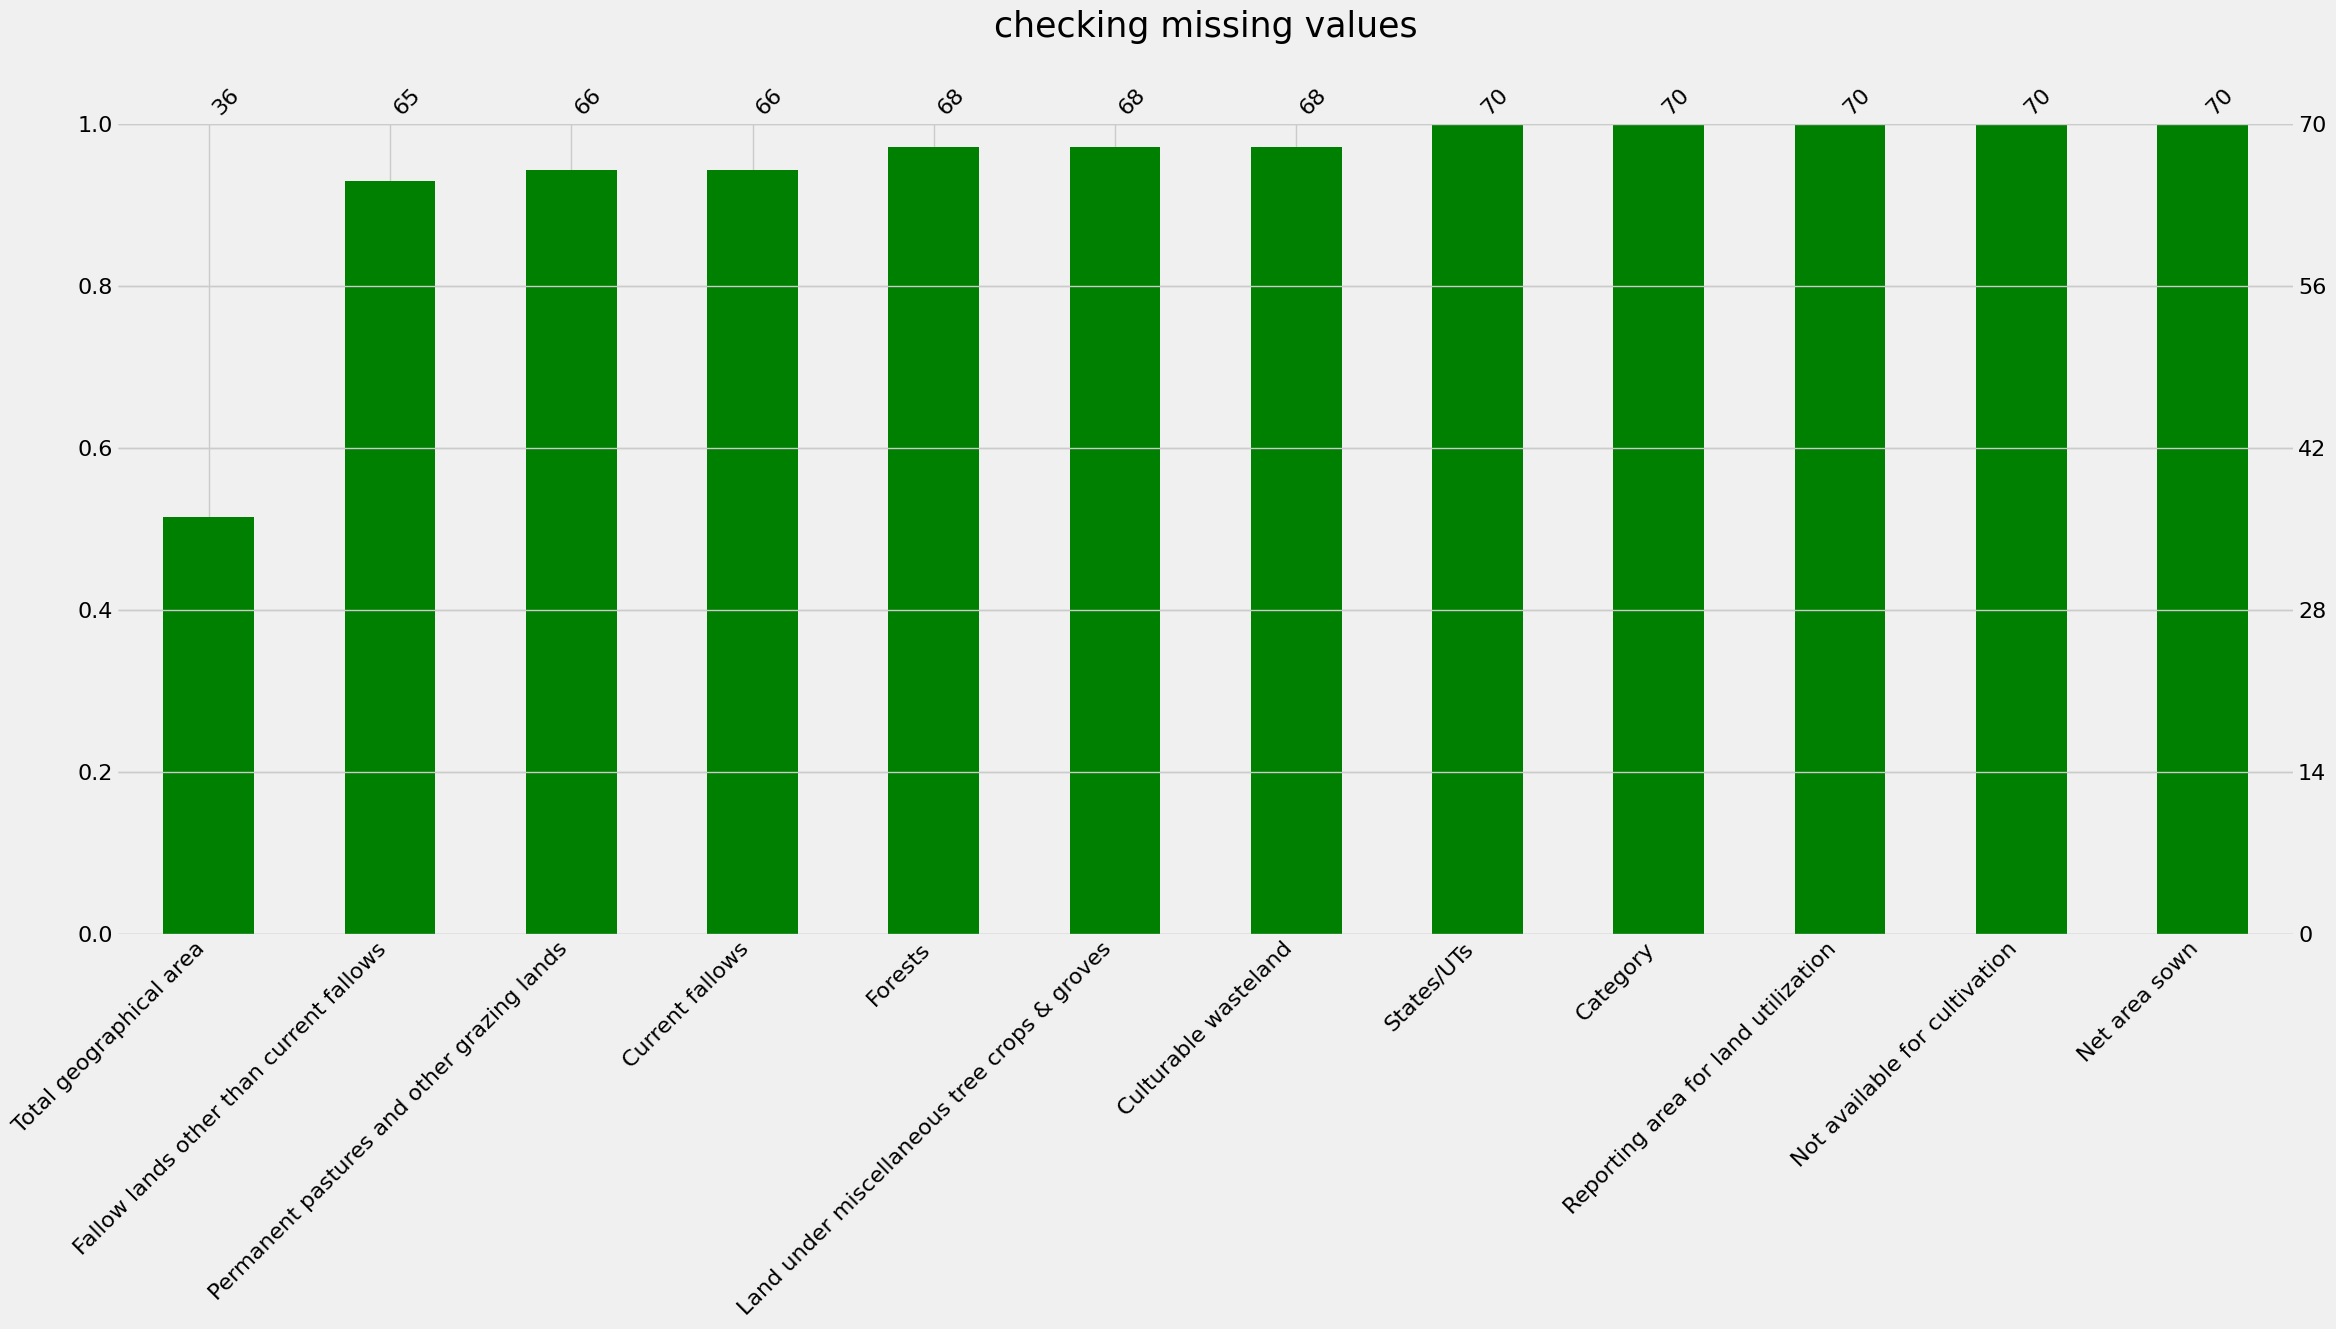

In [ ]:
# checking if the data containing any null values
# visualize missing values as a matrix

mno.bar(df, color = "green", sort= "ascending")
plt.title("checking missing values\n", fontsize = 25)
plt.show()

In [ ]:
df1 = df.drop(index = [i for i in range(df.shape[0]) if i%2 != 0])

In [ ]:
df2 = df.drop(index = [i for i in range(df.shape[0]) if i%2 == 0])

In [ ]:
df1 = df1.drop(labels= ["Category"], axis = 1)

In [ ]:
df2 = df2.drop(labels= ["Category", "Total geographical area", "Reporting area for land utilization"], axis = 1)


In [ ]:
df2.rename(columns = {'Not available for cultivation': "Area not available for cultivation (%)", 
                      "Forests": "Forests area (%)", 
                      "Permanent pastures and other grazing lands": "Permanent pastures and other grazing lands (%)",
                      "Land under miscellaneous tree crops & groves": "Land under miscellaneous tree crops & groves (%)",
                      "Culturable wasteland": "Culturable wasteland (%)",
                      "Fallow lands other than current fallows": "Fallow lands other than current fallows (%)",
                      "Current fallows": "Current fallow lands (%)",
                      "Net area sown": "Net area sown (%)"}, inplace = True)

In [ ]:
df1.index = [i for i in range(df1.shape[0])]

In [ ]:
df2.index = [i for i in range(df2.shape[0])]

In [ ]:
corrected_df = pd.concat([df1,df2.drop(columns="States/UTs")], axis= "columns")
corrected_df

States/UTs  Total geographical area  \
0              Andhra Pradesh                  27507.0   
1           Arunachal Pradesh                   8374.0   
2                       Assam                   7844.0   
3                       Bihar                   9416.0   
4                Chhattisgarh                  13519.0   
5                       Delhi                    148.0   
6                         Goa                    370.0   
7                     Gujarat                  19602.0   
8                     Haryana                   4421.0   
9            Himachal Pradesh                   5567.0   
10            Jammu & Kashmir                  22224.0   
11                  Jharkhand                   7972.0   
12                  Karnataka                  19179.0   
13                     Kerala                   3886.0   
14             Madhya Pradesh                  30825.0   
15                 Mahrashtra                  30771.0   
16                    Manipur                   2233.0   
17                  Meghalaya                   2243.0   
18                    Mizoram                   2108.0   
19                   Nagaland                   1658.0   
20                     Odisha                  15571.0   
21                     Punjab                   5036.0   
22                  Rajasthan                  34224.0   
23                     Sikkim                    710.0   
24                 Tamil Nadu                  13006.0   
25                    Tripura                   1049.0   
26              Uttar Pradesh                  24093.0   
27                Uttarakhand                   5348.0   
28                West Bengal                   8875.0   
29  Andaman & Nicobar Islands                    825.0   
30                 Chandigarh                     11.0   
31       Dadra & Nagar Haveli                     49.0   
32                Daman & Diu                     11.0   
33                Lakshwadeep                      3.0   
34                 Puducherry                     48.0   

    Reporting area for land utilization  Forests  \
0                                 27505   6210.0   
1                                  5659   5154.0   
2                                  7850   1954.0   
3                                  9360    622.0   
4                                 13790   6355.0   
5                                   147      1.0   
6                                   361    125.0   
7                                 18868   1854.0   
8                                  4372     39.0   
9                                  4545   1101.0   
10                                 3781   2023.0   
11                                 7970   2333.0   
12                                19050   3072.0   
13                                 3886   1082.0   
14                                30756   8699.0   
15                                30758   5214.0   
16                                 1951   1693.0   
17                                 2227    942.0   
18                                 1946   1594.0   
19                                 1595    863.0   
20                                15571   5813.0   
21                                 5033    308.0   
22                                34265   2698.0   
23                                  728    319.0   
24                                13027   2106.0   
25                                 1049    606.0   
26                                24201   1654.0   
27                                 5666   3465.0   
28                                 8684   1174.0   
29                                  795    717.0   
30                                    7      0.0   
31                                   49     20.0   
32                                    3      NaN   
33                                    3      0.0   
34                                   49      0.0   

    Not available for cultivation  Permanent pastures and

In [ ]:
corrected_df.columns

Index(['States/UTs', 'Total geographical area',
       'Reporting area for land utilization', 'Forests',
       'Not available for cultivation',
       'Permanent pastures and other grazing lands',
       'Land under miscellaneous tree crops & groves', 'Culturable wasteland',
       'Fallow lands other than current fallows', 'Current fallows',
       'Net area sown', 'Forests area (%)',
       'Area not available for cultivation (%)',
       'Permanent pastures and other grazing lands (%)',
       'Land under miscellaneous tree crops & groves (%)',
       'Culturable wasteland (%)',
       'Fallow lands other than current fallows (%)',
       'Current fallow lands (%)', 'Net area sown (%)'],
      dtype='object')

In [ ]:
corrected_df.fillna(0, inplace = True)


In [ ]:
corrected_df

States/UTs  Total geographical area  \
0              Andhra Pradesh                  27507.0   
1           Arunachal Pradesh                   8374.0   
2                       Assam                   7844.0   
3                       Bihar                   9416.0   
4                Chhattisgarh                  13519.0   
5                       Delhi                    148.0   
6                         Goa                    370.0   
7                     Gujarat                  19602.0   
8                     Haryana                   4421.0   
9            Himachal Pradesh                   5567.0   
10            Jammu & Kashmir                  22224.0   
11                  Jharkhand                   7972.0   
12                  Karnataka                  19179.0   
13                     Kerala                   3886.0   
14             Madhya Pradesh                  30825.0   
15                 Mahrashtra                  30771.0   
16                    Manipur                   2233.0   
17                  Meghalaya                   2243.0   
18                    Mizoram                   2108.0   
19                   Nagaland                   1658.0   
20                     Odisha                  15571.0   
21                     Punjab                   5036.0   
22                  Rajasthan                  34224.0   
23                     Sikkim                    710.0   
24                 Tamil Nadu                  13006.0   
25                    Tripura                   1049.0   
26              Uttar Pradesh                  24093.0   
27                Uttarakhand                   5348.0   
28                West Bengal                   8875.0   
29  Andaman & Nicobar Islands                    825.0   
30                 Chandigarh                     11.0   
31       Dadra & Nagar Haveli                     49.0   
32                Daman & Diu                     11.0   
33                Lakshwadeep                      3.0   
34                 Puducherry                     48.0   

    Reporting area for land utilization  Forests  \
0                                 27505   6210.0   
1                                  5659   5154.0   
2                                  7850   1954.0   
3                                  9360    622.0   
4                                 13790   6355.0   
5                                   147      1.0   
6                                   361    125.0   
7                                 18868   1854.0   
8                                  4372     39.0   
9                                  4545   1101.0   
10                                 3781   2023.0   
11                                 7970   2333.0   
12                                19050   3072.0   
13                                 3886   1082.0   
14                                30756   8699.0   
15                                30758   5214.0   
16                                 1951   1693.0   
17                                 2227    942.0   
18                                 1946   1594.0   
19                                 1595    863.0   
20                                15571   5813.0   
21                                 5033    308.0   
22                                34265   2698.0   
23                                  728    319.0   
24                                13027   2106.0   
25                                 1049    606.0   
26                                24201   1654.0   
27                                 5666   3465.0   
28                                 8684   1174.0   
29                                  795    717.0   
30                                    7      0.0   
31                                   49     20.0   
32                                    3      0.0   
33                                    3      0.0   
34                                   49      0.0   

    Not available for cultivation  Permanent pastures and

In [ ]:
corrected_df.isnull().mean().mean()

0.0

In [ ]:
corrected_df.to_csv("Area_percent_separate_land_pattern.csv")

## **3. Data Visualization**

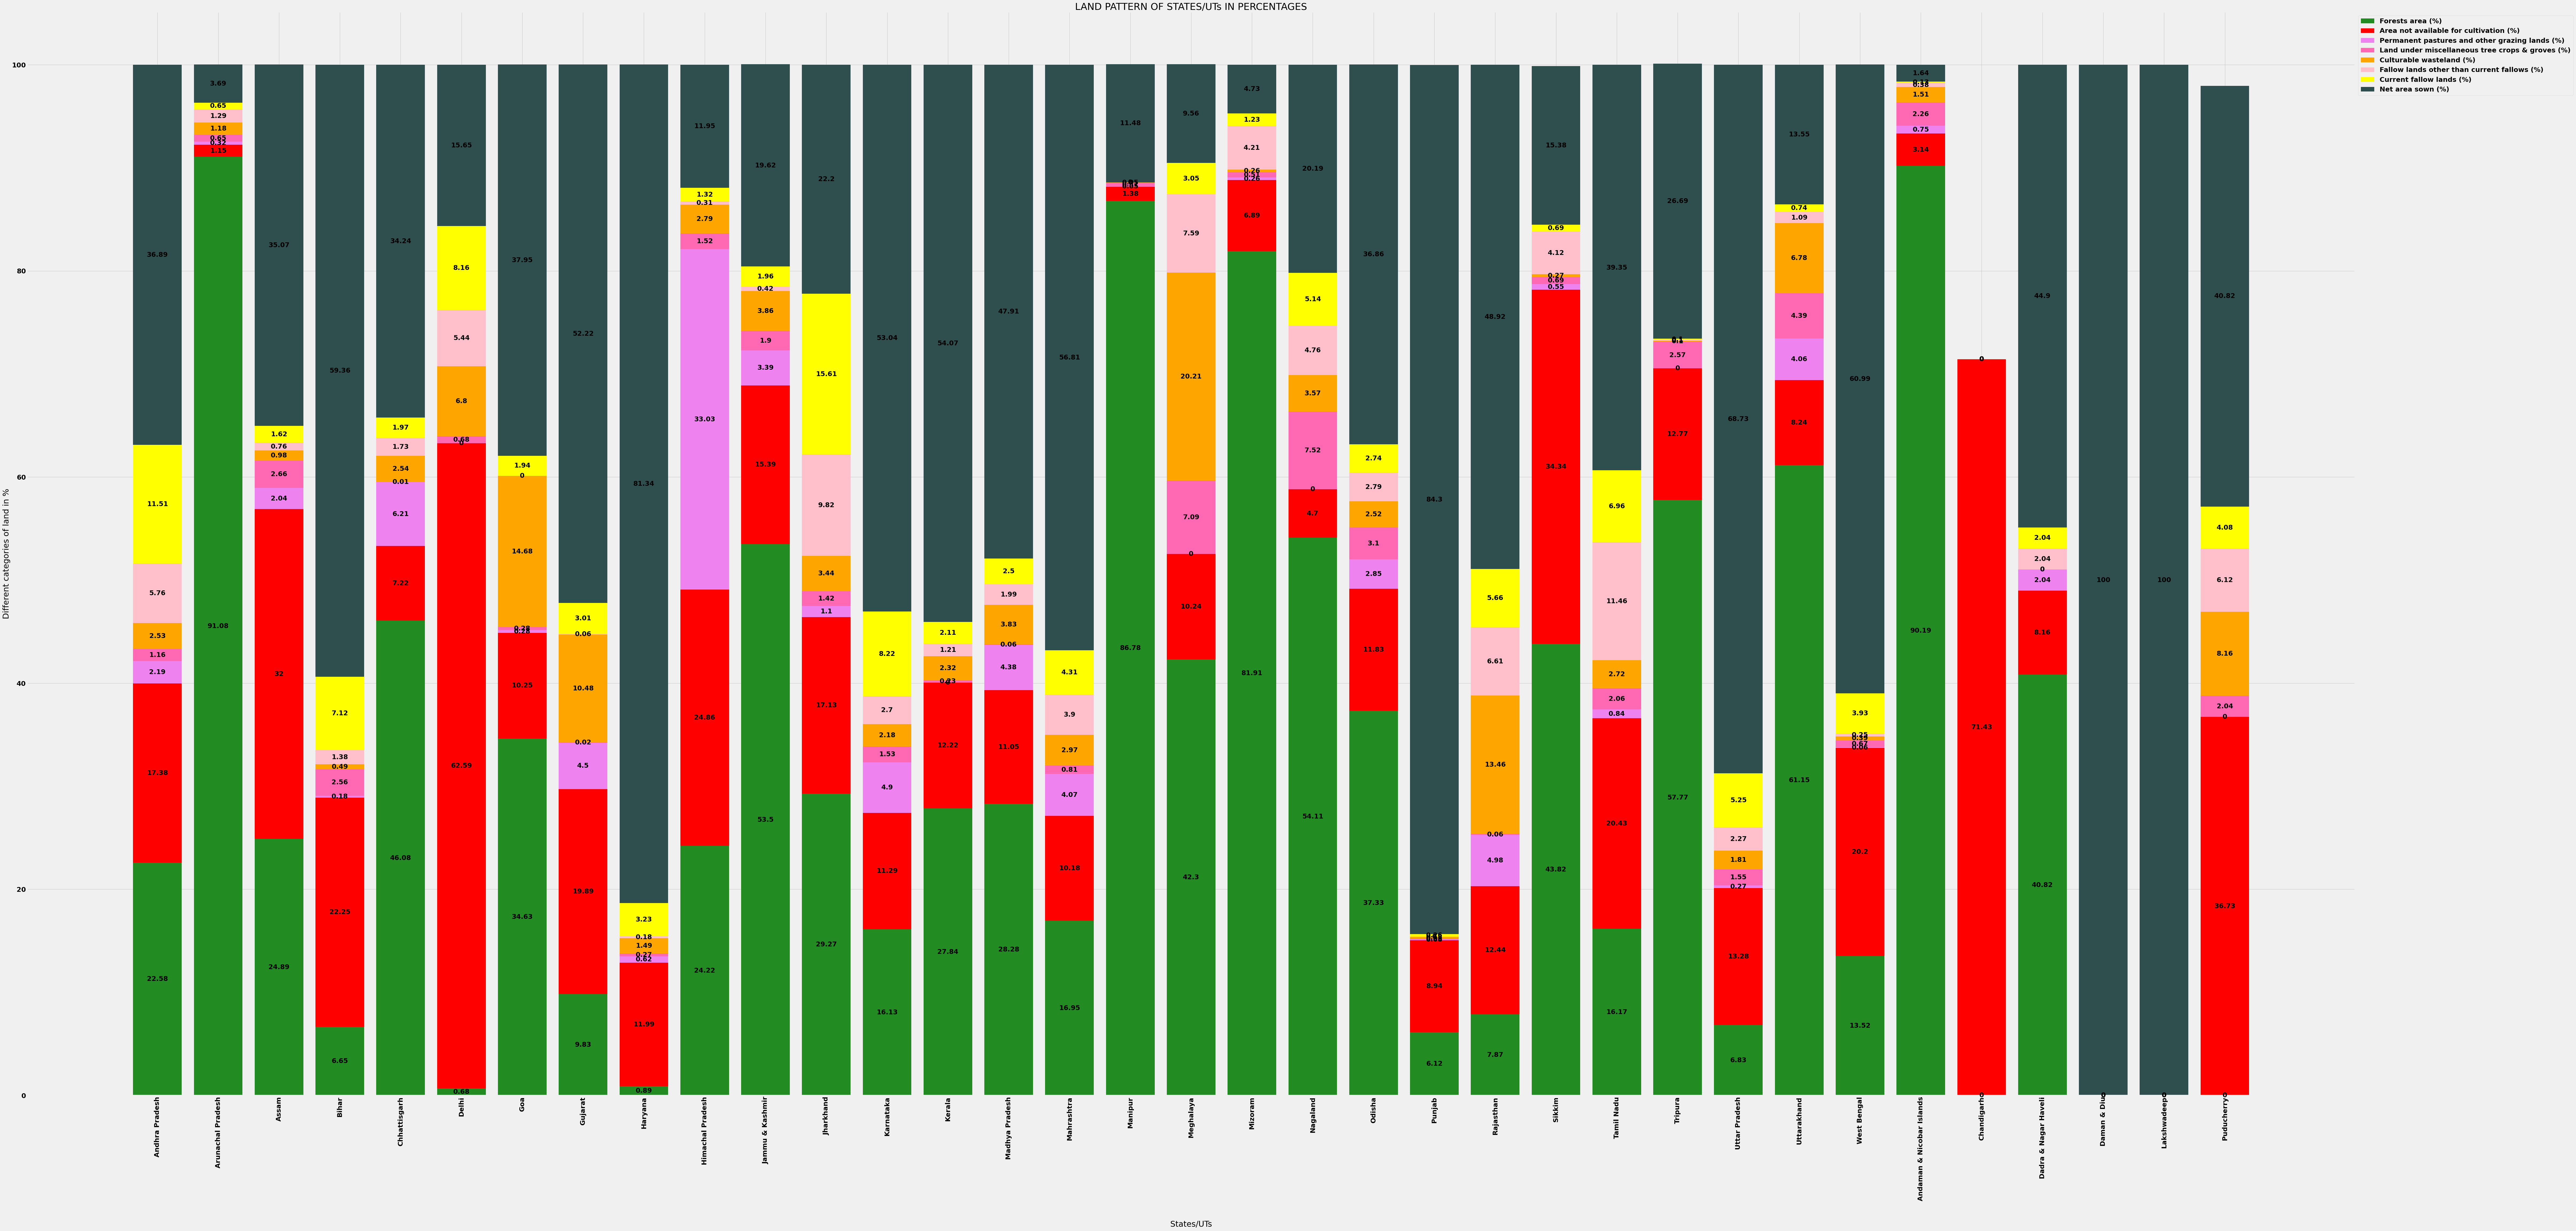

In [ ]:
plt.rcParams['figure.figsize']=(100,50)
font = {
        'weight' : 'bold',
        'size' : 18
        }
plt.rc('font', **font)

y = corrected_df['States/UTs'].values
x1 = np.array(corrected_df['Forests area (%)'])
x2 = np.array(corrected_df['Area not available for cultivation (%)'])
x3 = np.array(corrected_df['Permanent pastures and other grazing lands (%)'])
x4 = np.array(corrected_df['Land under miscellaneous tree crops & groves (%)'])
x5 = np.array(corrected_df['Culturable wasteland (%)'])
x6 = np.array(corrected_df['Fallow lands other than current fallows (%)'])
x7 = np.array(corrected_df['Current fallow lands (%)'])
x8 = np.array(corrected_df['Net area sown (%)'])

# Make the plot and show it on the screen

fig, ax = plt.subplots()
p1 = ax.bar(y, x1, color= 'forestgreen', label= 'Forests area (%)')
p2 = ax.bar(y, x2, bottom=x1, color='red', label='Area not available for cultivation (%)')
p3 = ax.bar(y, x3, bottom= x1+x2, color='violet', label='Permanent pastures and other grazing lands (%)')
p4 = ax.bar(y, x4, bottom= x1+x2+x3, color='hotpink', label='Land under miscellaneous tree crops & groves (%)')
p5 = ax.bar(y, x5, bottom= x1+x2+x3+x4, color='orange', label='Culturable wasteland (%)')
p6 = ax.bar(y, x6, bottom= x1+x2+x3+x4+x5, color='pink', label='Fallow lands other than current fallows (%)')
p7 = ax.bar(y, x7, bottom= x1+x2+x3+x4+x5+x6, color='yellow', label='Current fallow lands (%)')
p8 = ax.bar(y, x8, bottom= x1+x2+x3+x4+x5+x6+x7, color='darkslategray', label='Net area sown (%)')

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p4, label_type='center')
ax.bar_label(p5, label_type='center')
ax.bar_label(p6, label_type='center')
ax.bar_label(p7, label_type='center')
ax.bar_label(p8, label_type='center')


plt.xlabel("\n\nStates/UTs")
plt.ylabel("Different categories of land in %")
plt.title("LAND PATTERN OF STATES/UTs IN PERCENTAGES")
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1,1))
plt.show()



In [ ]:
corrected_df.columns

Index(['States/UTs', 'Total geographical area',
       'Reporting area for land utilization', 'Forests',
       'Not available for cultivation',
       'Permanent pastures and other grazing lands',
       'Land under miscellaneous tree crops & groves', 'Culturable wasteland',
       'Fallow lands other than current fallows', 'Current fallows',
       'Net area sown', 'Forests area (%)',
       'Area not available for cultivation (%)',
       'Permanent pastures and other grazing lands (%)',
       'Land under miscellaneous tree crops & groves (%)',
       'Culturable wasteland (%)',
       'Fallow lands other than current fallows (%)',
       'Current fallow lands (%)', 'Net area sown (%)'],
      dtype='object')

In [ ]:
# corrected_df['States/UTs']

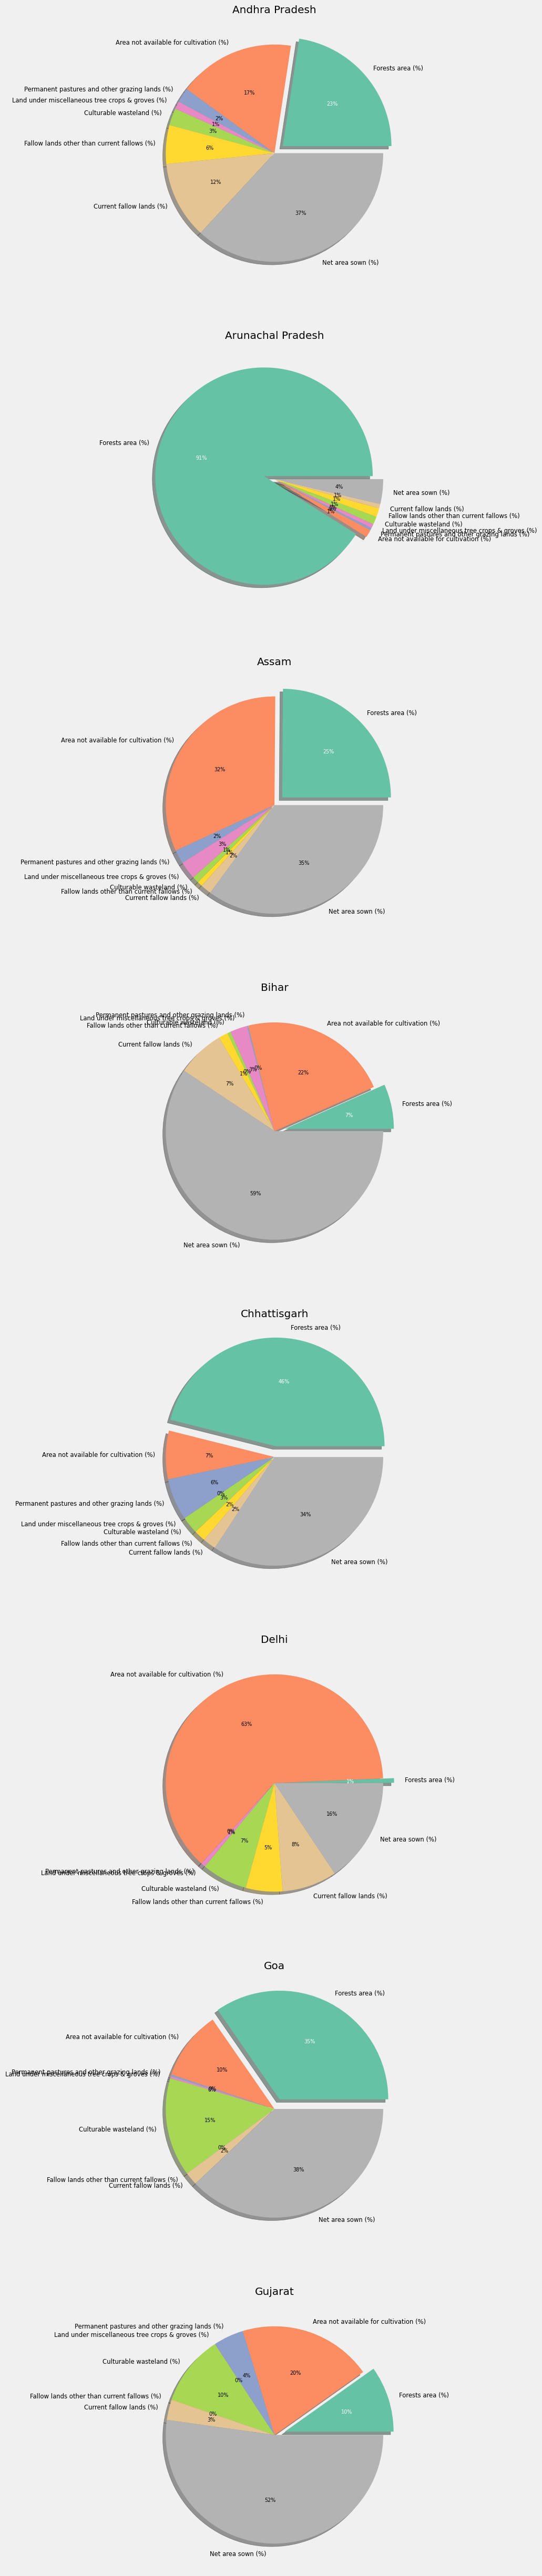

In [ ]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(8):

    patches, texts, autotexts = axes[i].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i].set_title(corrected_df['States/UTs'][i])

plt.show()



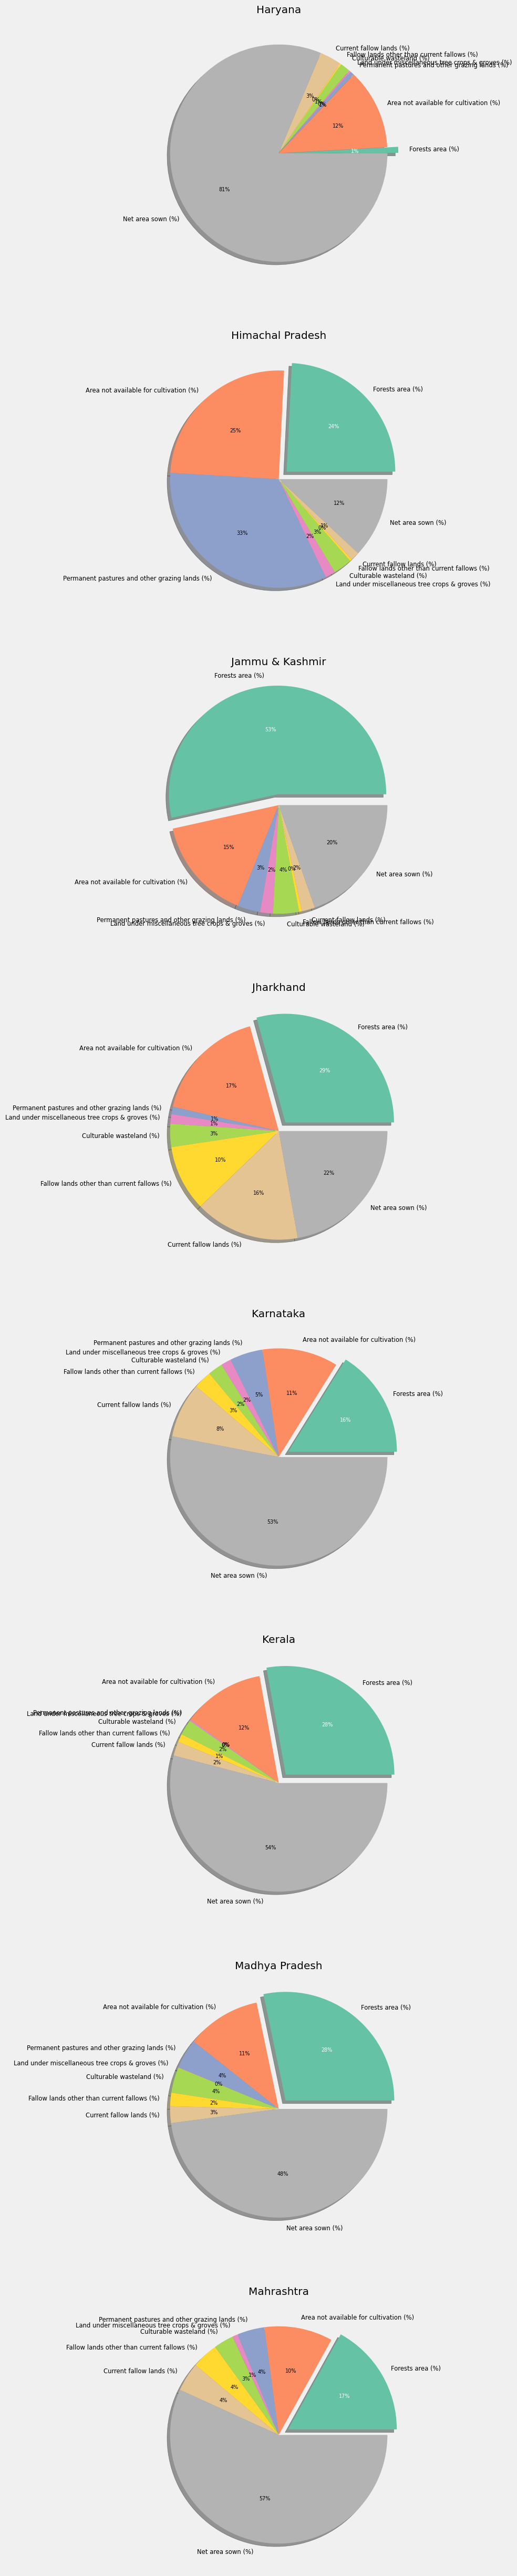

In [ ]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(8,16):

    patches, texts, autotexts = axes[i-8].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-8].set_title(corrected_df['States/UTs'][i])

plt.show()

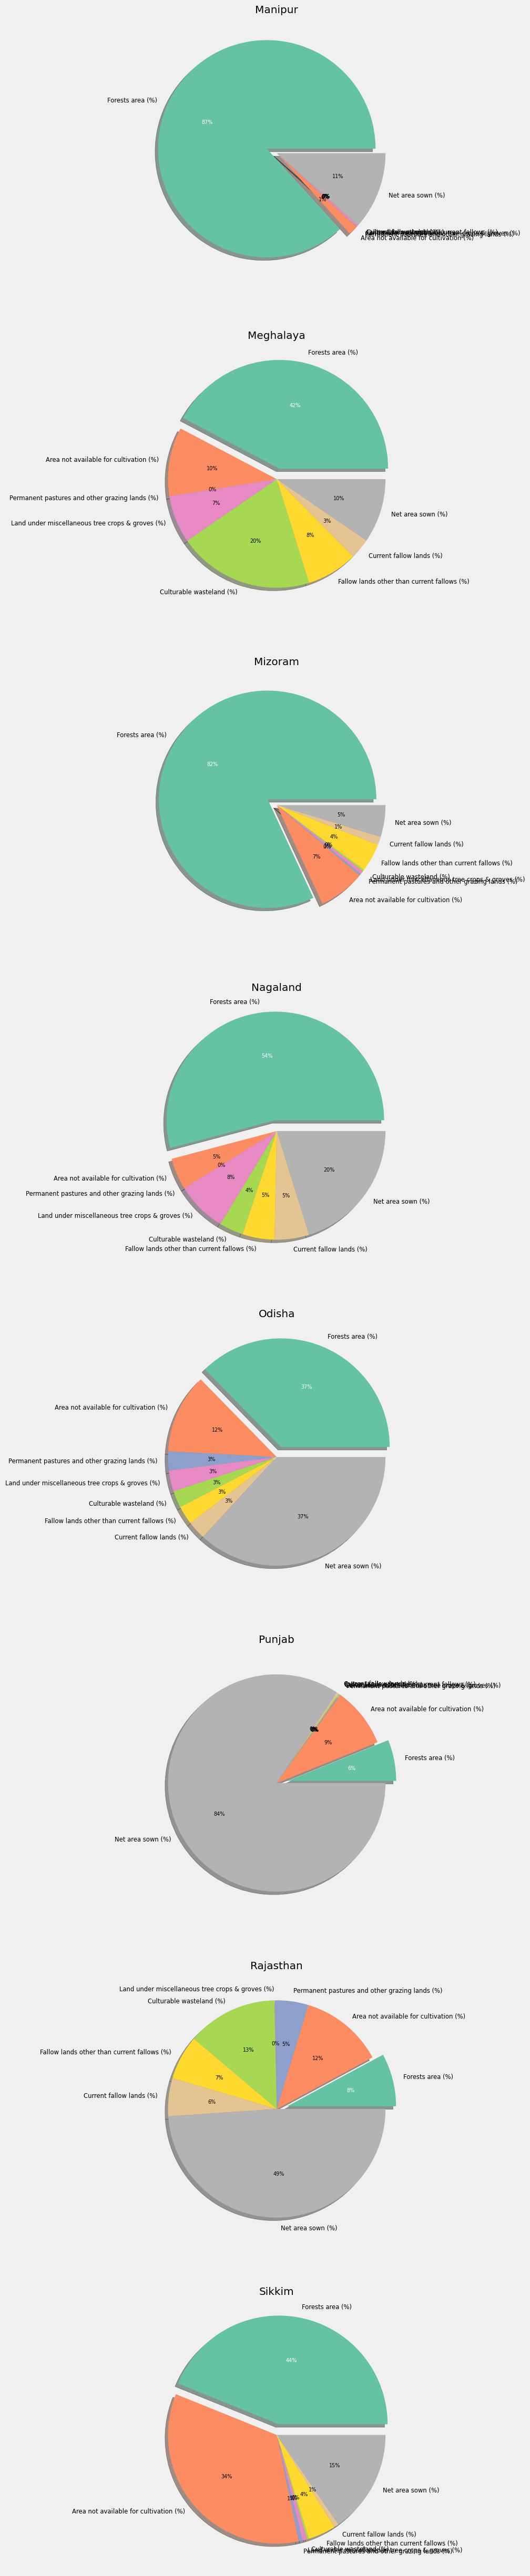

In [ ]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(16, 24):

    patches, texts, autotexts = axes[i-16].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-16].set_title(corrected_df['States/UTs'][i])

plt.show()

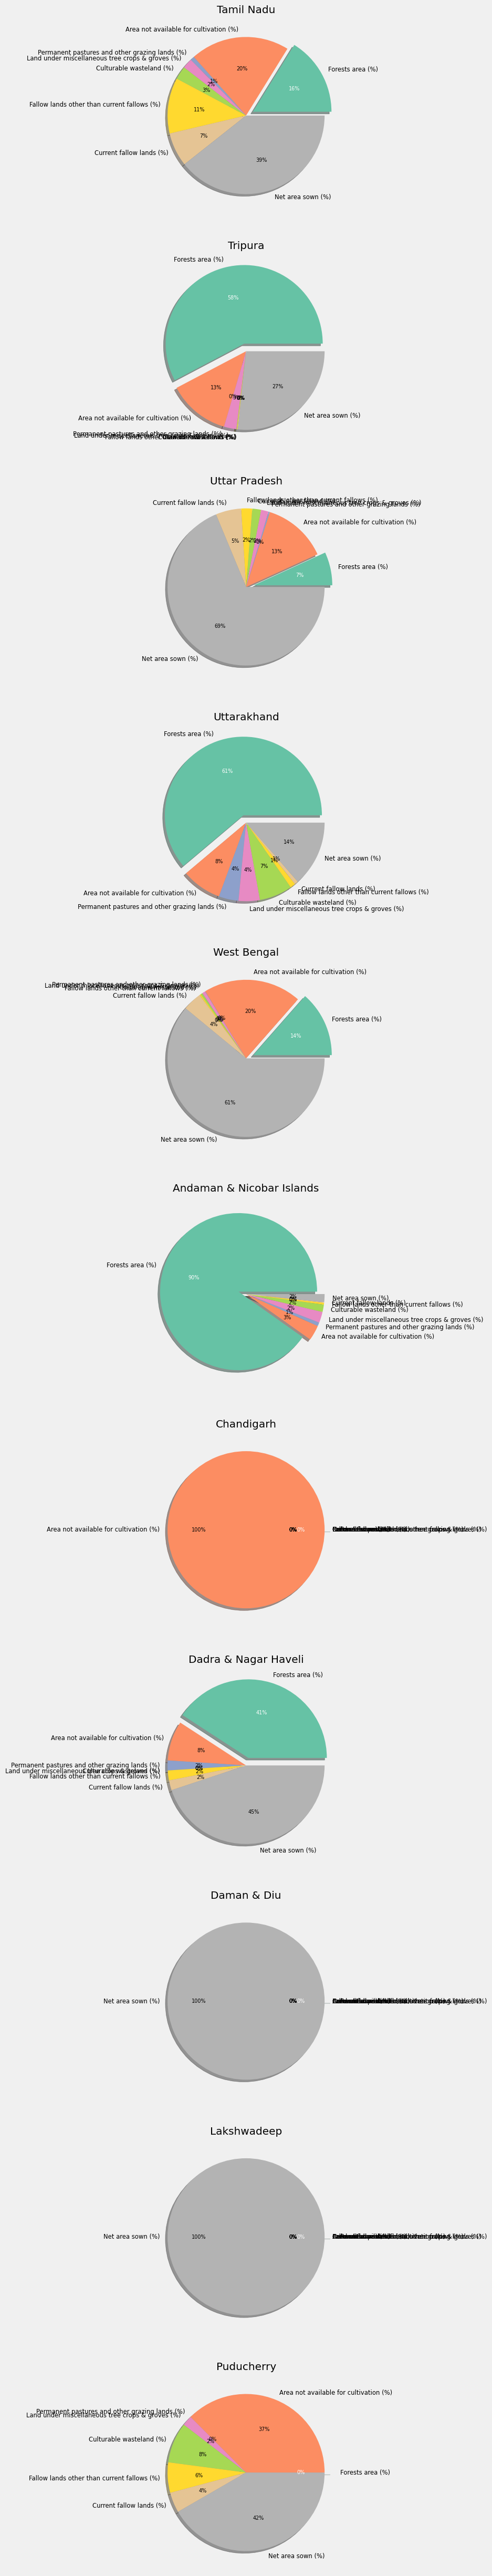

In [ ]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=11,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(24, 35):

    patches, texts, autotexts = axes[i-24].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-24].set_title(corrected_df['States/UTs'][i])

plt.show()